In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('./data/realest.csv')
data.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [3]:
data.head(160)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [4]:
# Removing Missing values
print("Before DropNA")
org_len = len(data)
print(org_len)
number_that_will_be_removed = data.isnull().values.sum() # total number of nulls
print(number_that_will_be_removed)
df = data.dropna()
print("After DropNA")
new_len = len(df)
print(new_len)
print(df.isnull().values.sum())

Before DropNA
157
38
After DropNA
128
0


Creating Summary List

In [5]:
summary_list = [] 

In [6]:
filtered_bedroom_bath = df[(df.Bathroom >= 2) & (df.Bedroom >=4)]
tax_filtered_bedroom_bath = filtered_bedroom_bath['Tax']
statistics = [tax_filtered_bedroom_bath.describe()['mean'],
              tax_filtered_bedroom_bath.describe()['std'],
              tax_filtered_bedroom_bath.describe()['50%'],
              tax_filtered_bedroom_bath.describe()['min'],
              tax_filtered_bedroom_bath.describe()['max']]
summary_list.append(statistics)
             
print(summary_list)

[[1013.3888888888889, 198.912969112237, 1041.5, 554.0, 1248.0]]


In [7]:
tax_filtered_bedroom_bath.describe()

count      18.000000
mean     1013.388889
std       198.912969
min       554.000000
25%       945.750000
50%      1041.500000
75%      1182.500000
max      1248.000000
Name: Tax, dtype: float64

In [8]:
data_frame = df[df.Space > 800].sort_values(by='Price', ascending=False)
summary_list.append(data_frame)
data_frame

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
114,90.0,8.0,2293.0,12.0,50.0,1181.0,3.0,2.0,0.0
36,88.0,8.0,2278.0,12.0,50.0,1183.0,3.0,2.0,0.0
140,88.0,7.0,2277.0,12.0,50.0,1248.0,3.0,2.0,0.0
88,88.0,8.0,2228.0,12.0,50.0,1208.0,3.0,2.0,0.0
62,85.0,7.0,2295.0,12.0,50.0,1233.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
19,35.0,4.0,1137.0,7.0,25.0,561.0,1.5,0.0,0.0
45,35.0,5.0,1142.0,7.0,25.0,543.0,1.5,0.0,0.0
71,34.0,4.0,1095.0,7.0,25.0,530.0,1.5,0.0,0.0
97,34.0,4.0,1087.0,7.0,25.0,584.0,1.5,0.0,0.0


In [9]:
df_quantiles = df.quantile(.125)
df_quantiles['Lot']

number_of_observations = len(df[df.Lot >= df_quantiles['Lot']])
summary_list.append(number_of_observations)

In [10]:
len(summary_list)

3

Regression List

In [11]:
# Bedroom, Space, Room, Lot, Tax, Bathroom, Garage, Condition

In [12]:
# model_parameters

model_parameters =list(df.columns[1:])
model_parameters.insert(0, 'intercept')
model_parameters


['intercept',
 'Bedroom',
 'Space',
 'Room',
 'Lot',
 'Tax',
 'Bathroom',
 'Garage',
 'Condition']

In [13]:
# Price prediction
# result of the model usng input
# ['Bedroom','Space','Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']
# input = [3, 1500, 8, 40, 1000, 2, 1, 0]


Linear Regression Model

In [14]:
y = df['Price']
x = df.loc[:, df.columns != 'Price']

In [15]:
# Splitting into Training and Testing Data: using sklearn's train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = regressor.predict(x_test)

# Mean Squared Error on test set

loss = mean_squared_error(y_test, y_pred)
print(f"Loss on test set: {loss}")

# from regression list

price_prediction = round(regressor.predict([[3, 1500, 8, 40, 1000, 2, 1, 0]])[0])
price_prediction

Loss on test set: 57.074519782616235


69.0

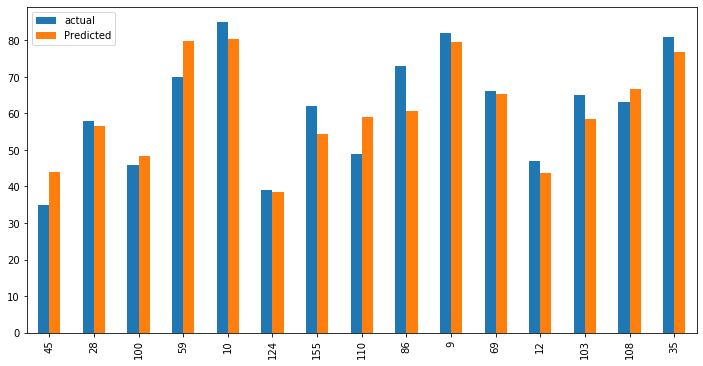

In [27]:
# Actual vs. Prediction - Test set
a_p_data = pd.DataFrame({"actual" : y_test, "Predicted" : y_pred})
a_p_data.head(15).plot(kind='bar', figsize=(12,6))
plt.show()

In [28]:
df["Price"].unique()

array([53., 55., 56., 58., 64., 44., 70., 82., 85., 45., 47., 49., 60.,
       62., 66., 35., 38., 46., 50., 65., 54., 61., 72., 81., 88., 36.,
       42., 48., 57., 59., 51., 84., 52., 69., 34., 39., 43., 63., 41.,
       73., 80., 67., 90., 37., 32.])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


class AnalysisDataAndFitLinearRegression:

    def __init__(self):
        self.version = 1

    def analyse_and_fit_lrm(self, path):
        # a path to a dataset is "./data/realest.csv"
        # dataset can be loaded by uncommenting the line bellow
        data = pd.read_csv(path)
        
        summary_dict = {}
        
        #summary_dict - statistics
        filtered_bedroom_bath = data[(data.Bathroom >= 2) & (data.Bedroom >=4)]
        tax_filtered_bedroom_bath = filtered_bedroom_bath['Tax']
        statistics = [tax_filtered_bedroom_bath.describe()['mean'],
                      tax_filtered_bedroom_bath.describe()['std'],
                      tax_filtered_bedroom_bath.describe()['50%'],
                      tax_filtered_bedroom_bath.describe()['min'],
                      tax_filtered_bedroom_bath.describe()['max']]
        summary_dict['statistics']=statistics
        
        #summary_dict - data_frame
        dataframe = data[data.Space > 800].sort_values(by='Price', ascending=False)
        summary_dict['dataframe']=dataframe
        
        #summary_dict - number_of_observations
        ## TO DO
        
        # regression_dict
        
        
        
        
        
        model_parameters = {}
        price_prediction = {}
        
        return {
            'model_parameters': model_parameters,
            'price_prediction': price_prediction
        }

    def __listwise_deletion(self, data: pd.DataFrame):
        return data.dropna()